# Символы

## Классификация

Системные символы начинаются с прописной (заглавной) буквы, значка доллара $ или некоторых спецсимволов (Table, Plot, N, $Assumptions, \[Pi], E). Для удобства рекомендуем в качестве своих символов использовать те, которые начинаются со строчной буквы (f, x1, tN0). Таким образом, по нашей неофициальной классификации есть два вида символов: системные и пользовательские.

In [1]:
Print[a]

a


## Системные символы (Plus и Times)

In [2]:
2 + a*b

2 + a b

При желании можно посмотреть полную форму вычисленного выражения с помощью функции FullForm (посмотрите документацию!) и убедиться в том, что это действительно краткая запись применения Plus и Times:

In [3]:
FullForm[2 + a*b]

Plus[2, Times[a, b]]

-Graphics-
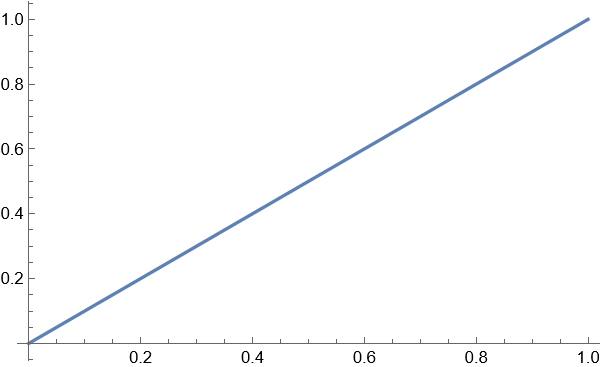

In [4]:
Plot[x, {x, 0, 1}] (* тоже выражение с системным символом *)

## Способы применения функции

In [5]:
f[x, y]
x~f~y

f @ x (* очень высокий приоритет *)
x // f (* очень низкий приоритет *)
f[x]

f[x, y]
f[x, y]
f[x]
f[x]
f[x]

## Вычисление выражений

Цель алгоритма - замена выражений. Работа алгоритма заключается в том, чтобы, постепенно заменяя выражения в определённом порядке, прийти к итоговому выражению, которое мы называем результатом вычисления. Суть ячейки вывода в том, что она повторяет написанное в ячейке ввода, только с учётом всех замен, сделанных алгоритмом.

In [11]:
f[x][g[x], 7] (* сначала вычислится f, x, f[x], g, x, g[x], f[x][g[x], 7] *)

f[5][g[5], 7]

In [10]:
x = 5

5

In [2]:
x = 5;

В исключительных случаях бывает так, что ячейка вывода даже не образуется. Это происходит тогда и только тогда, когда итоговым результатом вычисления выражения является символ Null

In [3]:
HoldForm[FullForm[x = 5;]]

CompoundExpression[Set[x, 5], Null]

In [4]:
Null

## Алгоритм вычисления выражения

In [ ]:
|                                     [--------------]                                     |
|                 /------------------→|    НАЧАЛО    |                                     |
|                 |                   [--------------]                                     |
|                 |                          🠗                                             |
|                 |                   /--------------\                                     |
|                 |                   | Элементарное |                                     |
|                 |        да /-------|  выражение ? |-------\ нет                         |
|                 |           |       \--------------/       |                             |
|					        |           🠗 					                    🠗                             |
|                 |     /--------------\             (--------------)                      |
|                 |     |   Символ ?   |-----\ нет   |  Вычисление  |                      |
|                 |     \--------------/     |       |    головы    |                      |
|                 |         да /     \ нет   |       | и аргументов |                      |
|                 |            |      \------|       | от атрибутов |                      |
|                 |            🠗             |       (--------------)                      |
|                 |     /--------------\     |              |                              |
|                 |     |   Правила ?  |←----+--------------/                              |
|                 |     \--------------/     |                                             |
|                 |    подошли /     \ нет   |                                             |
|                 |            |      \------|                                             |
|                 |            🠗             |                                             |
|                 |     (--------------)     |                                             |
|                 \-----|  Применение  |     |                                             |
|                       |    правил    |     |                                             |
|                       (--------------)     |                                             |
|                                            🠗                                             |
|                                     [--------------]                                     |
|                                     |    КОНЕЦ     |                                     |
|                                     [--------------]                                     |

## Изменение порядка вычисления. Аттрибуты символов

In [5]:
Hold[2+2]

Hold[2 + 2]

In [6]:
Attributes[Hold]

{HoldAll, Protected}

In [8]:
{1, 2, f}*t
1*f[u]
Attributes[Times] (* всё из-за OneIdentity *)

{t, 2 t, f t}
{Flat, Listable, NumericFunction, OneIdentity, Orderless, Protected}

In [11]:
Hold[Evaluate[2+2]]
HoldComplete[Evaluate[2+2]]

Hold[4]
HoldComplete[Evaluate[2 + 2]]

-Graphics-
{HoldAll, Protected, ReadProtected}
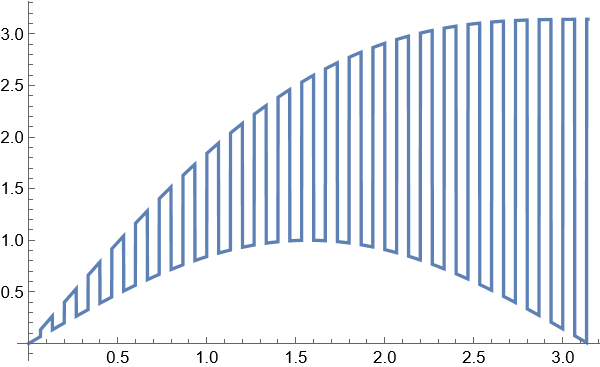

In [21]:
Plot[x Boole[OddQ[Floor[15 x]]] + Sin[x], {x, 0, Pi}]
Attributes[Plot]